 # Počítačová algebra -- cvičení 2

In [1]:
#Jednoduchá funkce na vynásobení dvou čísel, objektů, apod., která vypíše výsledný součin
def mult(a,b):
    print((a*b))

In [2]:
mult(2,5) #vynásobí 2 a 5 jako prvky ZZ (celá čísla)

Z32 = Zmod(32) 
a = Z32(7)
mult(a,a+2) #vynásobí 7*9 jako prvky v Z_32

mult(5,(2/3)) #vynásobí celé číslo ZZ(5) s racionálním číslem QQ(2/3),
#výsledek bude racionální číslo díky přirozené konverzi 5 ze ZZ do QQ

#Náhodný tip: Pokud upravíš funkci/data v buňce, nezapomeň pak buňku spustit, ať se změny projeví i při použití jinde

10
31
10/3


In [3]:
""" Tohle a # jsou dva způsoby, jak v Pythonu/Sagi psát komentáře. Obzvlášť u složitějších kusů kódu se to hodí dělat.

Funkce, která vezme přirozená čísla a,b a vypíše a^b spočtené binárním mocněním
"""
def binmoc(a,b):
    #základní podmínky
    if b == 0:
        return 1
    if a == 0:
        return 0
    
    bits = b.binary() #binary() jako string vrátí číslo b ve dvojkové soustavě, např 4.binary() = "100"
    bits = bits[::-1] #pro pozdější potřebu překlopíme string
                      #druhá možnost by bylo použít b.digits(2) vracející list bitů (už jako ZZ, ne string)
    pow_a = a
    res = 1
    for i in range(len(bits)):
        if ZZ(bits[i]) == 1: #pokud je i-tý bit 1, vynásob výsledek a^(2^i)
            res *= pow_a
        pow_a = pow_a*pow_a
    return res

In [4]:
print(binmoc(2,4))
print(binmoc(3,5))
print(binmoc(1,3))

16
243
1


## Euklidovy algoritmy a měření

Náhodný tip: buňky v notebooku nemusí sloužit pouze jako kód, ale například i jako kus textu s markdown syntaxí
(například tato buňka). 
Tyto role se v Jupyter notebooku přepínají nahoře (vpravo tlačítek od na spuštění).

In [5]:
#Klasický Euklidův algoritmus počítající NSD dvou celých čísel napsaný rekurzivně
def euklid1(a,b):
    if b == 0:
        return a
    return euklid1(b,a%b)

#Euklidův algoritmus bez použití rekurze
def euklid2(a,b):
    if a<b:
        a,b = b,a
    while b != 0:
        a,b = b, a % b
    return a

#Pomalejší Euklidův algoritmus, který místo modulení pouze čísla odečte
def euklid3(a,b):
    if a<b:
        a,b = b,a
    while b!=0:
        c = b-a
        a = b
        if c >0:
            b = c
        else:
            b = -c
    return a


In [6]:
#Náhodný tip: Chceš použít funkci, víš jak se jmenuje a nevíš jak se používá? Napiš za ní otazník a podívej se!
timeit?

#Další náhodný tip: Nevíš jak se daná funkce jmenuje?
#       Podívej se do dokumentace, do kódu, nebo jednoduše napiš do Googlu "sagemath <funkcionalita, kterou hledám>"
#A ještě jeden náhodný tip: stisknutím TAB umí Sage sám doplňovat, hodí se to třeba pro hledání funkcí různých tříd

In [7]:
print(euklid1(15,3))
print(euklid2(-5,2)) #můžeš si zkusit rozmyslet, jak se výše uvedené algoritmy chovají na záporných číslech
print(euklid3(7,8))

3
-1
1


In [8]:
#Jednoduchá ukázka měření trvání funkce
#Funkce timeit příkaz zopakuje number-krát a uloží si průměrný čas, toto zopakuje repeat-krát;
#na výstupu je nejlepší průměrný čas. Existují i jiné čistě Pythonovské varianty jako např. "%timeit libovolný_kód"
a = 52143
b = 343242
print(timeit("euklid1(a,b)", repeat = 50, number = 1000))
print(timeit("euklid2(a,b)", repeat = 50, number = 1000))
print(timeit("euklid3(a,b)", repeat = 50,  number = 1000))
print(timeit("gcd(a,b)", repeat = 50,  number = 1000))

1000 loops, best of 50: 7.01 μs per loop
1000 loops, best of 50: 5.03 μs per loop
1000 loops, best of 50: 35.9 μs per loop
1000 loops, best of 50: 851 ns per loop


In [9]:
#Spustí 1000krát euklid1 s náhodnými čísly z intervalu 0-2^100, změří průměrný čas, zopakuje 10krát
x = timeit("euklid1(ZZ.random_element(0,2^100),ZZ.random_element(0,2^100))", repeat = 10, number = 1000)
print(x) #výsledek můžeme uložit do proměnné
print(x.series) #takto můžeme zobrazit všechny průměrné naměřené časy, či např. spočítat průměr z nich
print(mean(x.series))

1000 loops, best of 10: 39.7 μs per loop
[4.040749999694526e-05, 4.25863999989815e-05, 4.136189998826012e-05, 4.0183699980843814e-05, 4.108470003120601e-05, 4.352740000467747e-05, 4.076720000011846e-05, 4.0038399980403486e-05, 3.973630000837147e-05, 3.977329999906942e-05]
4.09466799988877e-05


In [10]:
"""
Pomocná funkce na měření rychlosti funkcí na NSD.
Spustíme fci func loops-krát s dvěma náhodnými čísly z intervalu 0-2^i. Průměrný čas uložíme ve formátu dvojice 
(i, prum_čas) do výsledného seznamu takovýchto dvojic -- tento list funkce vrací.
Čísla i jsou daná pomocí range(lb,up,step) -- tedy např. pro lb=100, ub = 2000, step = 100 generujeme čísla postupně
shora omezená hodnotami 2^100, 2^200, ..., 2^1900.

Možností jak tohle dělat je spousta, záleží jak naměřené výsledky vás zajímají.
Např. dobrý smysl může dávat mít hodnoty čísel omezené i zdola.
"""
def measure(lb,ub,step,func,loops):
    res = []
    for i in range(lb,ub,step):
        stmt = "{0}(ZZ.random_element(0,{1}),ZZ.random_element(0,{1}))".format(func,2^i)
        t = timeit(stmt,number = loops)
        res.append((i,mean(t.series)))
    return res

In [11]:
#Příklad použití pro funkce na počítání NSD. Výpočet může chvíli trvat.
m_eukl1 = measure(100,2000,100,"euklid1",1000)
m_eukl2 = measure(100,2000,100,"euklid2",1000)
#m_eukl3 = measure(100,2000,100,"euklid3",30)
print(m_eukl1)

[(100, 4.755963332718238e-05), (200, 0.00010085533334252735), (300, 0.00020647013332927597), (400, 0.0002879409666638821), (500, 0.00038482283331298583), (600, 0.0004566493666692016), (700, 0.0005143207666891005), (800, 0.0006134251666565736), (900, 0.001001548199992006), (1000, 0.0014431967333269615), (1100, 0.0010903195999950792), (1200, 0.0009406252999906427), (1300, 0.0006744714333326556), (1400, 0.001703256499992373), (1500, 0.0008395792333370386), (1600, 0.0025036383666447366), (1700, 0.0021629096333247917), (1800, 0.0032573397666759165), (1900, 0.002202676666667685)]


In [12]:
#Následující kus kódu naměřenými hodnotami (tj. dvojice (i, čas)) proloží přímku, kterou uloží do proměnné l1, l2, ...
var('k1,k2')
model(x) = k1*x+k2

fit = find_fit(m_eukl1,model,parameters = [k1,k2], variables = [x],solution_dict = True)
a,b = fit[k1],fit[k2]
l1 = plot(a*x+b,(x,100,1900),rgbcolor=(0,0,1))

fit = find_fit(m_eukl2,model,parameters = [k1,k2], variables = [x],solution_dict = True)
a,b = fit[k1],fit[k2]
l2 = plot(a*x+b,(x,100,1900),rgbcolor=(0,1,0))

#fit = find_fit(m_eukl3,model,parameters = [k1,k2], variables = [x],solution_dict = True)
#a,b = fit[k1],fit[k2]
#l3 = plot(a*x+b,(x,100,1900),rgbcolor=(1,0,0))

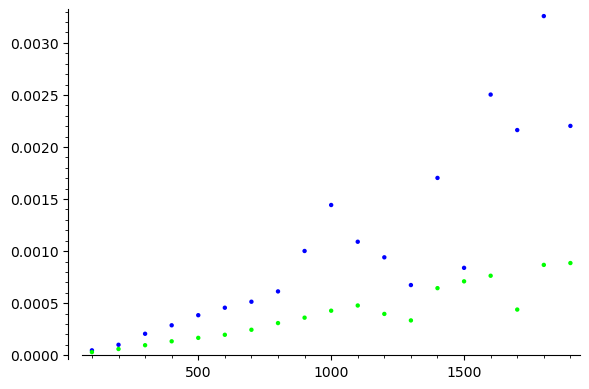

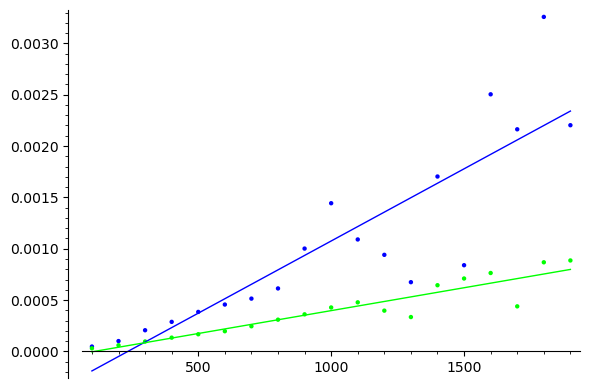

In [13]:
#Naměřené hodnoty můžeme chápat jako body v R^2 a zobrazit si je pomocí show jako graf
p1 = points(m_eukl1,rgbcolor=(0,0,1))
p2 = points(m_eukl2,rgbcolor=(0,1,0))
#p3 = points(m_eukl3,rgbcolor=(1,0,0))
show(p1+p2) #zobrazí naměřené časy pro rekurzivního a nerekurzivního euklida
#show(p2) #zobrazí body čistě pro nerekurzivní Euklid alg.
#show(p2+l2) 
show(p1+p2+l1+l2) #vykreslí i přímky proložené danými body

#S grafy si člověk může vyhrát libovolně velice, například tím prokládat i nelineární funkce. 
#Více zde https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html

## Celá čísla reprezentovaná v bázi B

In [14]:
#Funkce pro sčítání dvou čísel v bázi B -- reprezentace dat viz. zadání cvičení.
#Rozmyslete si, že algoritmus funguje i pokud jsou koeficienty záporné či větší než B.
def v_add(x,y,B):
    n = len(x); m = len(y)
    if n < m:
        x,y = y,x
        n,m = m,n
    res = [0 for i in range(n)]
    extra = 0
    for i in range(n):
        s = x[i]+(y[i] if i < m else 0)+extra
        extra, res[i] = s.quo_rem(B)
    if extra != 0:
        res.append(extra)
    while len(res)>0 and (res[-1] == 0): #zbav se přebytečných nul
        res.pop()
    return res

#Funkce pro násobení x konstantou ZZ(c)
def v_mul_const(x,c):
    res = [0 for i in range(len(x))]
    for i in range(len(x)):
        res[i] = c*x[i]
    return res
#Funkce pro odečtení dvou listů v bázi B
def v_sub(a,b,B):
    return v_add(a,v_mul_const(b,-1),B)

In [15]:
b = [1,1,1]
a = [2,1,1,0,1]
c = v_add(a,b,3)
print(c)
print(v_mul_const(a,3))
print(v_sub(a,b,3))

[0, 0, 0, 1, 1]
[6, 3, 3, 0, 3]
[1, 0, 0, 0, 1]


In [16]:
print(ZZ(b,3)) #takto lze jednoduše převést číslo v našem zápise zpátky do klasického celočíselného prvku ZZ
print(452.digits(3)) #konverze naopak funguje pomocí metody .digits(B)

13
[2, 0, 2, 1, 2, 1]


In [17]:
""" Upozornění k předávání parametrů do funkcí
Klasické proměnné jako celá čísla ZZ, string, ... se do parametrů funkcí předávají hodnotou, tedy ať už s nimi 
ve funkci děláme cokoli, tak hodnota původních proměnných se nezmění.

Naopak například seznamy se do funkcí předávají odkazem -- pokud je tedy uvnitř funkce upravujeme,
změní se i hodnota původních proměnných.
Příkladem buď následující kus kódu. Na tohle je ve funkcích naprogramovaných výše třeba si dát pozor
(při tvorbě výsledku např. tvořím nový list a neupravuju některé původní).
"""
def test_ZZ(x):
    x = -1
def test_string(x):
    x = "12345"
def test_seznam(promenna):
    promenna.append(2100)

a = 23
b = "abcd"
c = [1,2,3]
test_ZZ(a)
test_string(b)
test_seznam(c)
print(a)
print(b)
print(c)

23
abcd
[1, 2, 3, 2100]


In [28]:
#Běžné školské násobení
def school_mul(a,b,B):
    m = len(b)
    res = []
    for i in range(m):
        c = v_mul_const(a,b[i])
        c = [0 for i in range(i)] + c
        res = v_add(res,c,B)
    return res
#Násobení s pomocí Karacubova triku
def karacuba(a,b,B):
    if  len(b)<4: #pokud má číslo méně než 4 cifry, vynásob normálně
        return school_mul(a,b,B)
    n = max(len(a), len(b)) // 2
    a1,a0 = a[n:],a[:n] #rozděl čísla na dvě poloviny
    b1,b0 = b[n:],b[:n]
    a1b1 = karacuba(a1,b1,B)
    a0b0 = karacuba(a0,b0,B)
    mixed = [0 for i in range(n)] + v_add(v_add(karacuba(v_sub(a1,a0,B),v_sub(b0,b1,B),B),a0b0,B),a1b1,B)
    a1b1 = [0 for i in range(2*n)] + a1b1
    res = v_add(v_add(a0b0,a1b1,B),mixed,B)
    
    return res   

In [29]:
#Příklad jednoduchého měření času a porovnání
#Šlo by udělat pořádně podobně jako u Euklidova algoritmu výše pomocí napsané fce measure
a = ZZ.random_element(2^700,2^800)
b = ZZ.random_element(2^700,2^800)
D = 3
a_dig = a.digits(D); b_dig = b.digits(D)
print(timeit("school_mul(a_dig,b_dig,D)"))
print(timeit("karacuba(a_dig,b_dig,D)"))

5 loops, best of 3: 371 ms per loop
5 loops, best of 3: 250 ms per loop
